# Olivetti Faces

In [197]:
import numpy as np
import pandas as pd
import sklearn.decomposition # Módulo donde encontramos el análisis de componentes principales
import sklearn.manifold # Módulo donde encontramos el método t-Distributed Stochastic Neighbor Embedding
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.svm # Support vector machines
import sklearn.metrics
import sklearn.gaussian_process # Kernel de transformación del espacio
import sklearn.preprocessing
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import scipy
import sklearn.dummy


Olivetti blah blah

In [198]:
olivetti_faces = pd.read_csv("olivetti_faces.csv")
olivetti_faces.head()

0         1         2  ...      4094      4095  subject
0  0.309917  0.367769  0.417355  ...  0.161157  0.157025        0
1  0.454545  0.471074  0.512397  ...  0.152893  0.152893        0
2  0.318182  0.400826  0.491736  ...  0.148760  0.152893        0
3  0.198347  0.194215  0.194215  ...  0.752066  0.739669        0
4  0.500000  0.545455  0.582645  ...  0.173554  0.173554        0

[5 rows x 4097 columns]

El conjunto de datos contiene ... imágenes y ... atributos (pixeles + etiqueta)

In [199]:
olivetti_faces.shape

(400, 4097)

Así se ve el conjunto de datos.

In [200]:
olivetti_faces.iloc[0,:-1] #row 0 almost complete

0       0.309917
1       0.367769
2       0.417355
3       0.442149
4       0.528926
          ...   
4091    0.132231
4092    0.148760
4093    0.152893
4094    0.161157
4095    0.157025
Name: 0, Length: 4096, dtype: float64

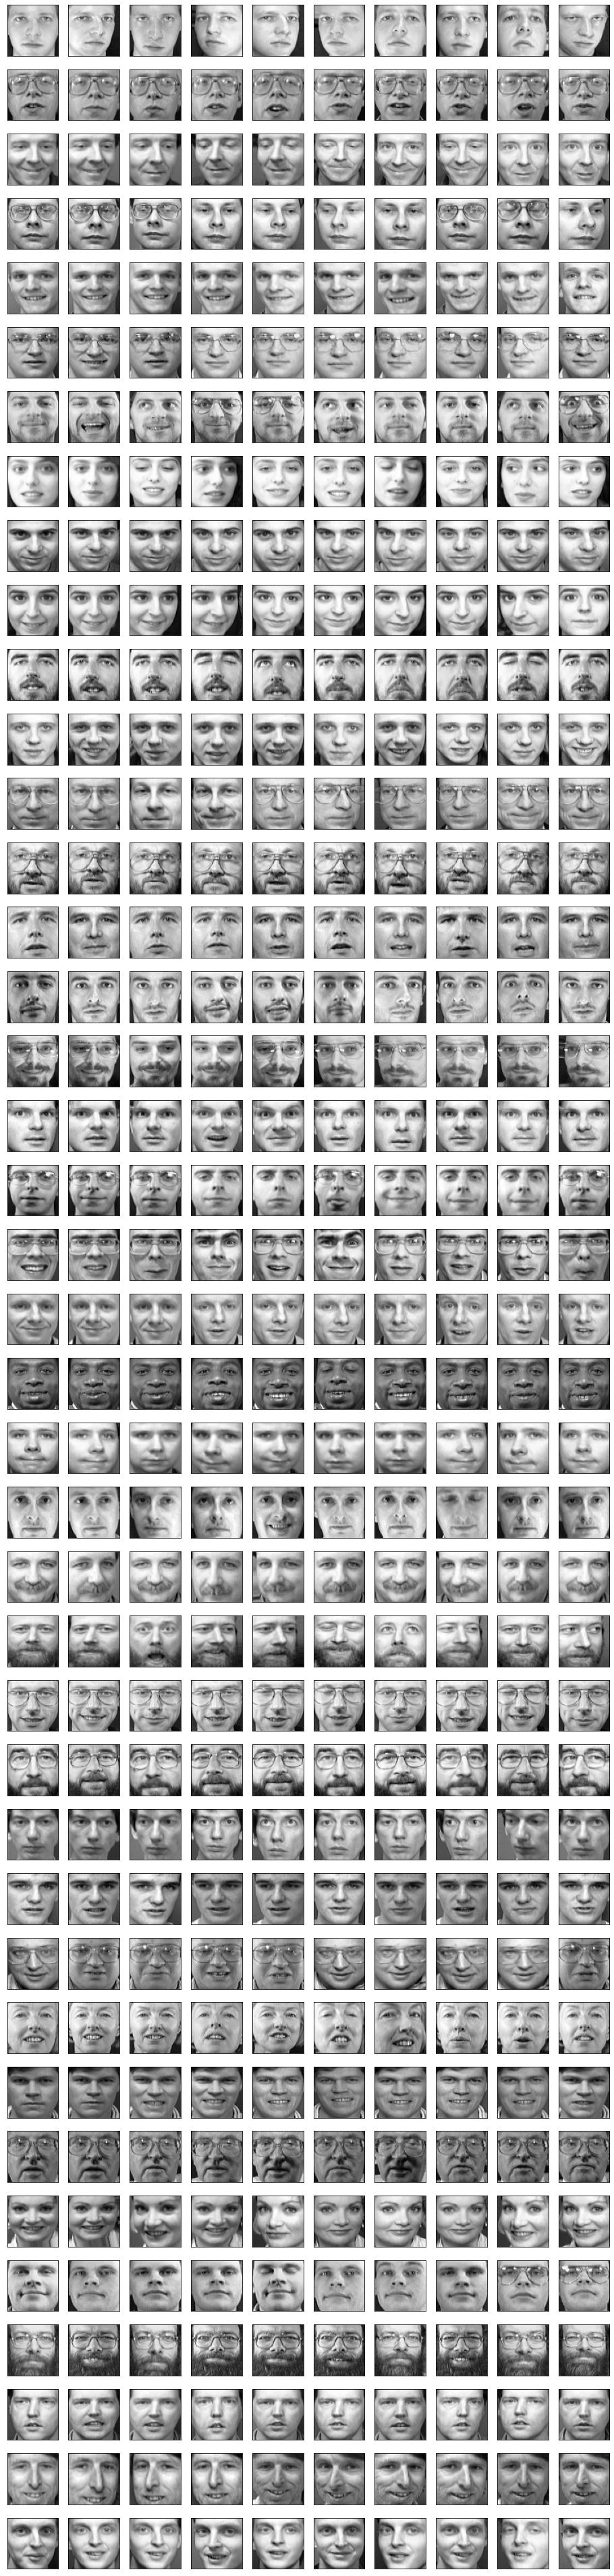

In [201]:
fig,axs = plt.subplots(40,10,figsize=(16, 70),subplot_kw={'xticks':[], 'yticks':[]})
for i,ax in enumerate(axs.flat):
    ax.imshow(
         olivetti_faces.iloc[i,:-1].values.reshape(64,-1),
         cmap="gray"
    )
    
    

Ajustemos un PCA sobre el conjunto de datos.

In [202]:
pca_olivetti = sklearn.decomposition.PCA()
pca_olivetti.fit(olivetti_faces.iloc[:,:-1])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Obtenemos una matriz con 400 componentes.

In [203]:
pca_olivetti.components_.shape

(400, 4096)

Así se ve el primer componente.

In [204]:
pca_olivetti.components_[0]

array([-0.0041911 , -0.0071095 , -0.00933609, ...,  0.00018516,
        0.00337965,  0.00318826])

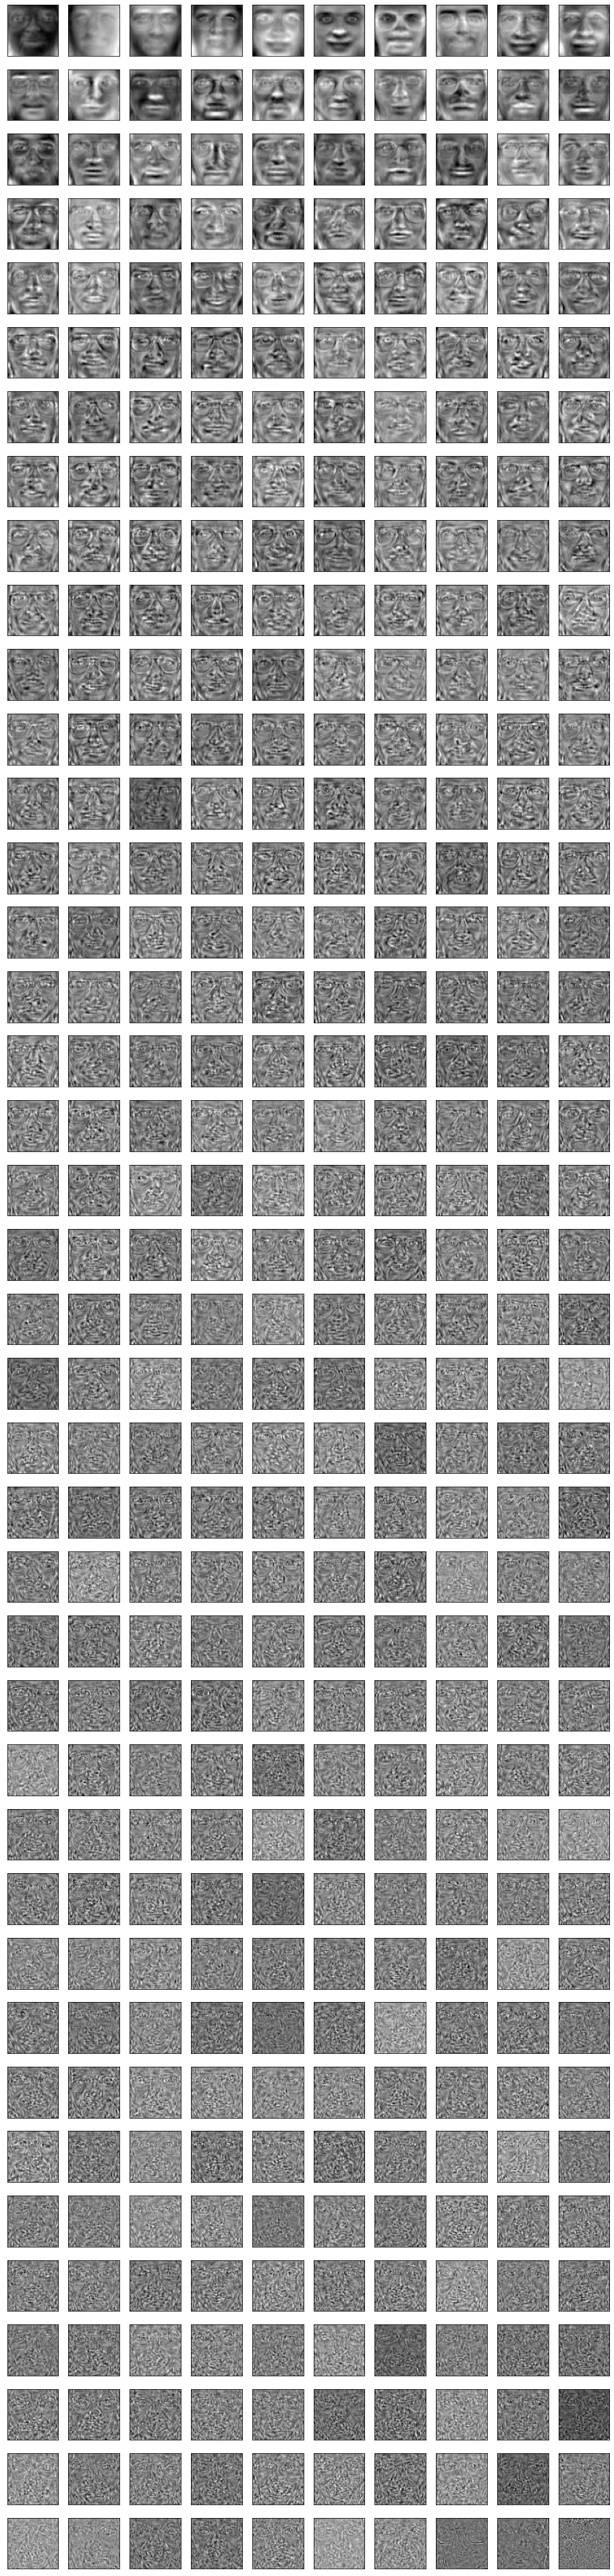

In [205]:
fig,axs = plt.subplots(40,10,figsize=(16, 70),subplot_kw={'xticks':[], 'yticks':[]})
for i,ax in enumerate(axs.flat):
    ax.imshow(
         pca_olivetti.components_[i].reshape(64,-1),
         cmap="gray"
    )

Acá podemos ver cuánta varianza explica cada uno de los 64 componentes.

In [206]:
pca_olivetti.explained_variance_ratio_

array([2.38127293e-01, 1.39939710e-01, 7.96861366e-02, 4.99833131e-02,
       3.60984798e-02, 3.15693930e-02, 2.42683231e-02, 2.03639767e-02,
       1.95811412e-02, 1.67212183e-02, 1.59522174e-02, 1.43697886e-02,
       1.24674107e-02, 1.14713318e-02, 1.06287736e-02, 9.77720334e-03,
       9.19060283e-03, 8.15573265e-03, 7.53874527e-03, 7.46984791e-03,
       6.98577778e-03, 6.14628185e-03, 5.83927715e-03, 5.69722520e-03,
       5.46190783e-03, 5.31855322e-03, 5.13816222e-03, 4.95841288e-03,
       4.57664069e-03, 4.41183411e-03, 4.02001710e-03, 3.84189834e-03,
       3.61950972e-03, 3.34542390e-03, 3.20380733e-03, 3.16040882e-03,
       3.05147325e-03, 2.98634742e-03, 2.82141008e-03, 2.74006498e-03,
       2.59771982e-03, 2.53990363e-03, 2.44547104e-03, 2.39839587e-03,
       2.30890404e-03, 2.26419089e-03, 2.22286388e-03, 2.20442949e-03,
       2.08920885e-03, 2.04983076e-03, 1.96842975e-03, 1.91435943e-03,
       1.85046049e-03, 1.78938964e-03, 1.77608168e-03, 1.72482704e-03,
      

Visualizamos la suma acumulada de las varianzas explicadas por cada componente.

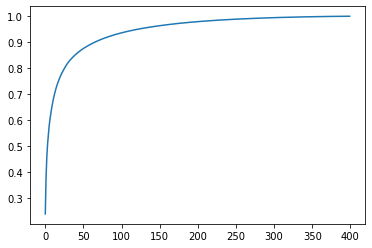

In [207]:
plt.plot(
    range(len(pca_olivetti.explained_variance_ratio_)),
    np.cumsum(pca_olivetti.explained_variance_ratio_)
)

Ajustemos un PCA de sólo 2 componentes para visualizar el conjunto de datos en un gráfico de dispersión.

In [208]:
pca_olivetti_2d = sklearn.decomposition.PCA(2)
olivetti_2d=pca_olivetti_2d.fit_transform(olivetti_faces.iloc[:,:-1])
olivetti_2d.shape

(400, 2)

Cada uno de los números tienden a acumularse juntos

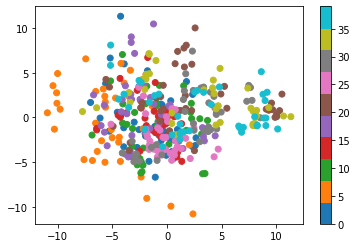

In [209]:
plt.scatter(
    olivetti_2d[:,0],
    olivetti_2d[:,1],
    c=olivetti_faces.subject,
    cmap='tab10'
)
plt.colorbar()

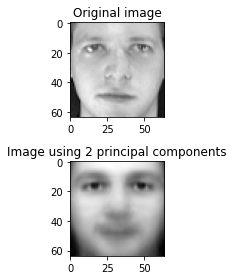

In [210]:
fig, axs = plt.subplots(2)

axs[0].imshow(
    olivetti_faces.iloc[0,:-1].values.reshape(64,-1),
    cmap="gray"
)
axs[0].set_title("Original image")

axs[1].imshow(
    pca_olivetti_2d.inverse_transform(olivetti_2d)[0].reshape(64,-1),
    cmap="gray"
)
axs[1].set_title("Image using 2 principal components")
fig.tight_layout()

In [211]:
pca_95p = sklearn.decomposition.PCA(0.95)
olivetti_95p = pca_95p.fit_transform(olivetti_faces.iloc[:,:-1])

In [212]:
pca_95p.components_.shape

(123, 4096)

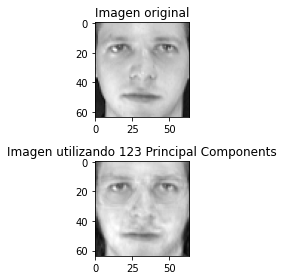

In [213]:
fig, axs = plt.subplots(2)

axs[0].imshow(
    olivetti_faces.iloc[0,:-1].values.reshape(64,-1),
    cmap="gray"
)
axs[0].set_title("Imagen original")

axs[1].imshow(
    pca_95p.inverse_transform(olivetti_95p)[0].reshape(64,-1),
    cmap="gray"
)
axs[1].set_title("Imagen utilizando 123 Principal Components")
fig.tight_layout()

##Metodo Supervisado: Support Vector Machines

In [214]:
(X_train, X_test, y_train, y_test) = sklearn.model_selection.train_test_split(olivetti_faces.iloc[:,:-1].to_numpy(),olivetti_faces.iloc[:,-1:].to_numpy(),test_size=0.3, 
    random_state=11)

# from sklearn.cross_validation import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
        # faces.data, faces.target, test_size=0.25, random_state=0)

In [215]:
svm_linear = sklearn.svm.SVC(kernel="linear")
svm_linear.fit(X_train, np.ravel(y_train,order='C'))


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

##Cross Validation


In [216]:
  olivetti_faces['subject']


0       0
1       0
2       0
3       0
4       0
       ..
395    39
396    39
397    39
398    39
399    39
Name: subject, Length: 400, dtype: int64

Funcion copiada del notebook 5.2-cross-validation.ipynb **cross_val_store**():

In [217]:
def cross_val_score(**kwargs):
    """
    Recibe los argumentos para pasárselos a la función sklearn.model_selection.cross_validate
    Retorna una lista con los valores de AUCROC de cada una de las divisiones.
    """
    cv = sklearn.model_selection.cross_validate( # Esta función entrena un modelo para distintos subconjuntos generados al azar.
        # scoring = 'roc_auc', # Usamos la medida de AUCROC para medir el rendimiento de los modelos
        cv = sklearn.model_selection.StratifiedKFold( # La división se realiza de manera estratificada
            n_splits = 10, # Creamos 10 subconjuntos
            shuffle = True, # Desordenamos los datos antes de dividirlos
        ),
        n_jobs = None, # Usamos sólo 1 worker para el entrenmiento
        **kwargs # Pasamos los argumentos recibidos por la función
    )
    return cv["test_score"]

In [218]:
dummy_scores = cross_val_score(
    estimator = sklearn.dummy.DummyClassifier(strategy="stratified"),
    X = olivetti_faces.iloc[:,:-1],
    y = olivetti_faces['subject']
)

In [219]:
svm_scores = cross_val_score(
    estimator = sklearn.svm.SVC(),
    X = olivetti_faces.iloc[:,:-1],
    y = olivetti_faces['subject']
)


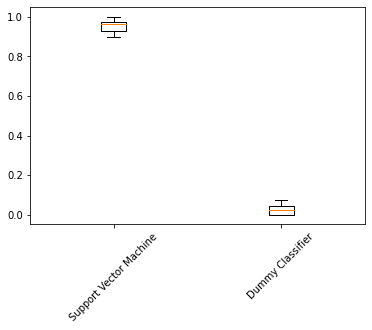

In [220]:
scores = [ # Guardamos todos los resultados en una lista
    svm_scores,
    dummy_scores
]
names = [
    "Support Vector Machine",
    "Dummy Classifier"
]
plt.boxplot(
    scores,
    labels = names
)
plt.xticks(rotation=45)
plt.show()

In [221]:
dict(
    zip(
        names,
        map(
            np.mean,
            scores
        )
    )
)

{'Dummy Classifier': 0.025, 'Support Vector Machine': 0.9575000000000001}

ANOVA:

In [222]:
scipy.stats.f_oneway(*scores)

F_onewayResult(statistic=4797.551724138272, pvalue=2.6463352747110985e-23)